# OC PROJET 4 - CLIENT SEGMENTATION
#### CLUSTERING NOTEBOOK
<br></br>
### SOMMAIRE
- <a href="#C1">I. Kmeans</a>
    - 1. Elbow Method
    - 2. Clustering
    - 3. Analyse des clusters
<br></br>   
    
- <a href="#C2">II. DBScan</a>
     - 1. 
     - 2.
     - 3. 
     - 4.

<font size="5">Importation des librairies</font>

In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn import metrics

<font size="5">Paramétrages Data Visualisation</font>

In [2]:
# Ajouter une ombre à la police
shadow = path_effects.withSimplePatchShadow(offset = (1,
- 0.75), shadow_rgbFace='darkblue', alpha = 0.25)

# Utiliser la police dans les graphiques, changer la couleur 
# et augmenter la résolution d'affichage
plt.rcParams['font.family'] = 'Ebrima'
plt.rcParams['text.color'] = 'white'
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.style.use('dark_background')
# set le theme seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.2',
'text.color': 'white','figure.figsize': (20, 16)})
plt.rcParams['figure.facecolor'] = '0.2'

# suppression de l'affichage max des colonnes
pd.set_option('display.max_columns', None)

In [3]:
# chargement du df master et conversion des 
# variables temporelles au format datetime
df = pd.read_csv('olist_master.csv')

df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])

In [4]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
review_score                            float64
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_category_name_english            object
seller_city                              object
seller_state                             object
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_purchase_datetime          datetime64[ns]
order_delivered_datetime         datetime64[ns]
month                                     int64
year                                    

# <a name="C1">I. Kmeans</a>

<font size="5">1. Elbow Method</font>

In [9]:
# Sélectionner les colonnes pertinentes pour la segmentation client
features = ['review_score', 'total_amount_client', 
'payment_installments', 'days_since_last_purchase']

# Créer un nouveau dataframe avec les colonnes sélectionnées
df_selected = df[features]

X = df_selected.values

inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Oliver\AppData\Local\Temp\ipykernel_9184\1529596157.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bx-', color = 'springgreen')


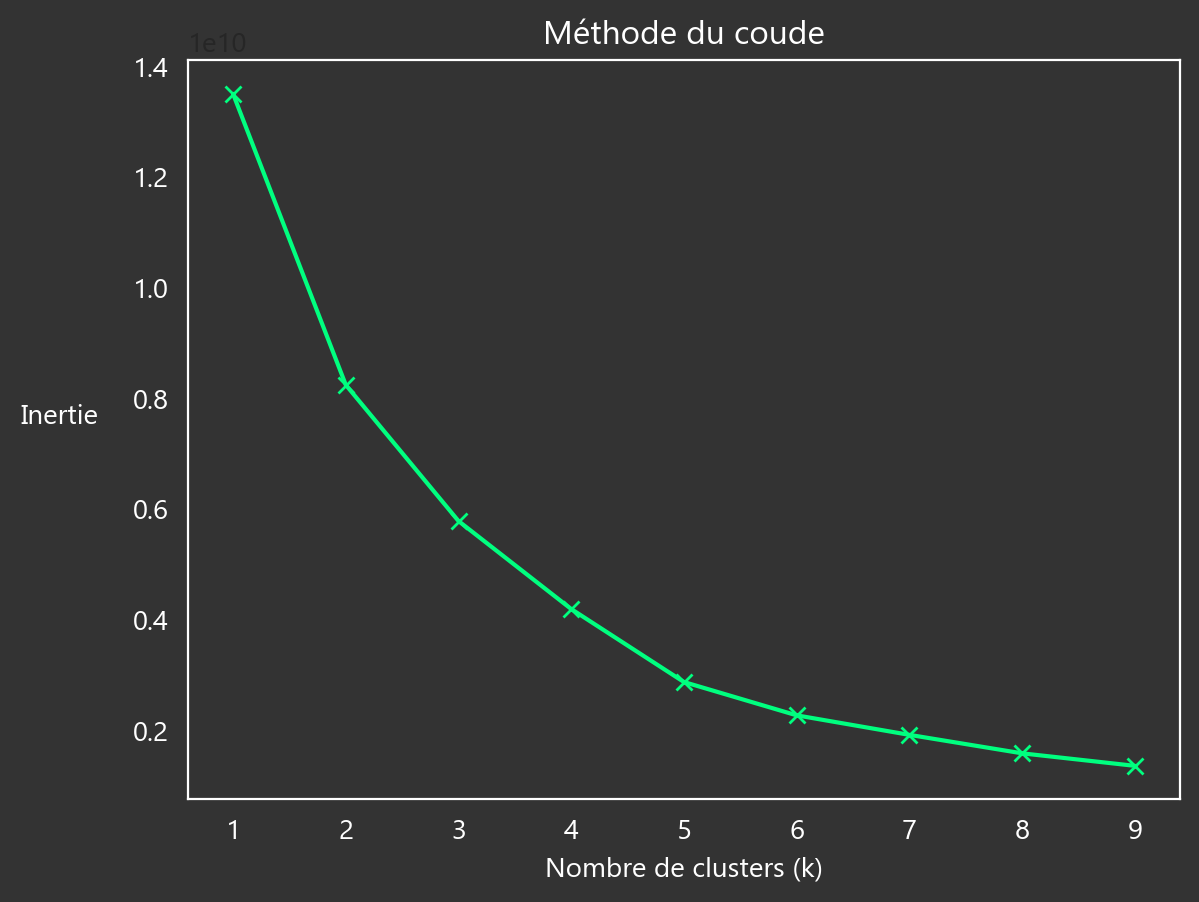

In [13]:
plt.rcParams['font.family'] = 'Ebrima'
plt.plot(K_range, inertia, 'bx-', color = 'springgreen')
plt.xlabel('Nombre de clusters (k)', color = 'white')
plt.gca().yaxis.set_label_coords(-0.13, 0.5)
plt.ylabel('Inertie', rotation = 360, color = 'white')
plt.title('Méthode du coude')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

<font size="5">2. Clustering</font>

In [80]:
data = df
data = data[data['total_amount_client'] <= 6000]

# Sélection des colonnes pertinentes pour la segmentation
X = data[features]

# Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme K-means
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_scaled)

# Ajout des étiquettes de clusters au dataframe d'origine
data['cluster'] = kmeans.labels_
kmeans_labels = kmeans.labels_

C:\Users\omira\AppData\Local\Temp\ipykernel_10060\2794908584.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# Évaluer les performances du modèle K-means
silhouette_score = metrics.silhouette_score(X_scaled, kmeans_labels)
calinski_harabasz_score = metrics.calinski_harabasz_score(X_scaled, kmeans_labels)
davies_bouldin_score = metrics.davies_bouldin_score(X_scaled, kmeans_labels)

In [82]:
print("Scores K-means :")
print("Silhouette score :", silhouette_score)
print("Calinski-Harabasz score :", calinski_harabasz_score)
print("Davies-Bouldin score :", davies_bouldin_score)

Scores K-means :
Silhouette score : 0.3259012294988092
Calinski-Harabasz score : 36328.551136100155
Davies-Bouldin score : 1.0799288582215396


Silhouette score : Le score de silhouette est de 0.32, ce qui indique une séparation modérée entre les clusters. Étant donné que le score de silhouette varie entre -1 et 1, cette valeur suggère que les échantillons d'un cluster sont relativement similaires entre eux, mais il peut également y avoir un certain chevauchement ou une certaine ambiguïté entre les clusters voisins.

Calinski-Harabasz score : Le score Calinski-Harabasz est de 36328. Un score élevé dans ce cas indique une bonne séparation des clusters et une compacité intra-cluster élevée. Cela suggère que le modèle K-means a réussi à former des clusters bien définis et distincts dans les données.

Davies-Bouldin score : Le score Davies-Bouldin est de 1.07. Ce score relativement bas indique une bonne séparation entre les clusters, où des valeurs proches de zéro sont considérées comme idéales. Ainsi, ce résultat suggère que le modèle K-means a réussi à former des clusters bien séparés.

<font size="5">3. Analyse des clusters</font>

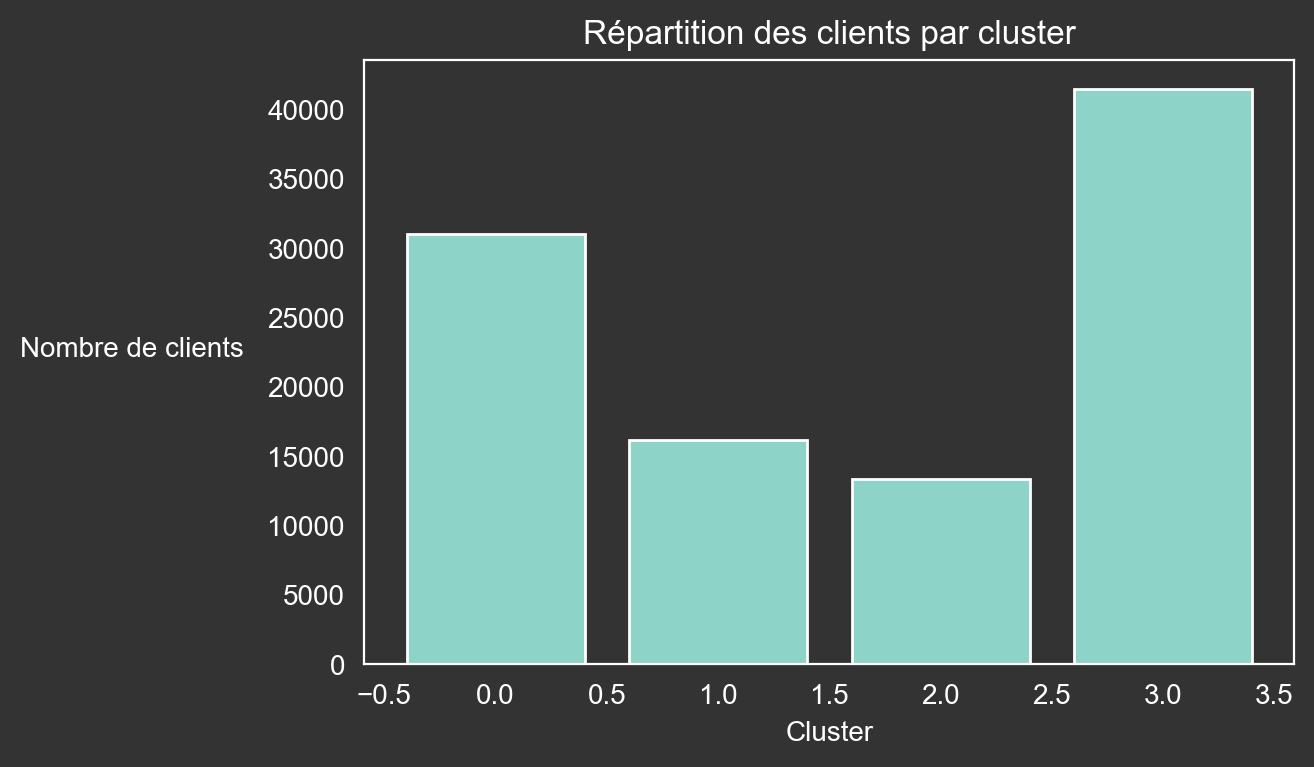

Nombre de clients par cluster:
3    41455
0    31045
1    16179
2    13370
Name: cluster, dtype: int64


In [55]:
# Afficher la répartition des clusters
cluster_counts = data['cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster', color = 'white')
plt.ylabel('Nombre de clients', color = 'white', rotation = 360)
plt.title('Répartition des clients par cluster')
plt.gca().yaxis.set_label_coords(-0.25, 0.5)
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

# Analyse des clusters
cluster_counts = data['cluster'].value_counts()
print("Nombre de clients par cluster:")
print(cluster_counts)

In [59]:
X.shape

(102049, 4)

C:\Users\omira\AppData\Local\Temp\ipykernel_10060\2569437652.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


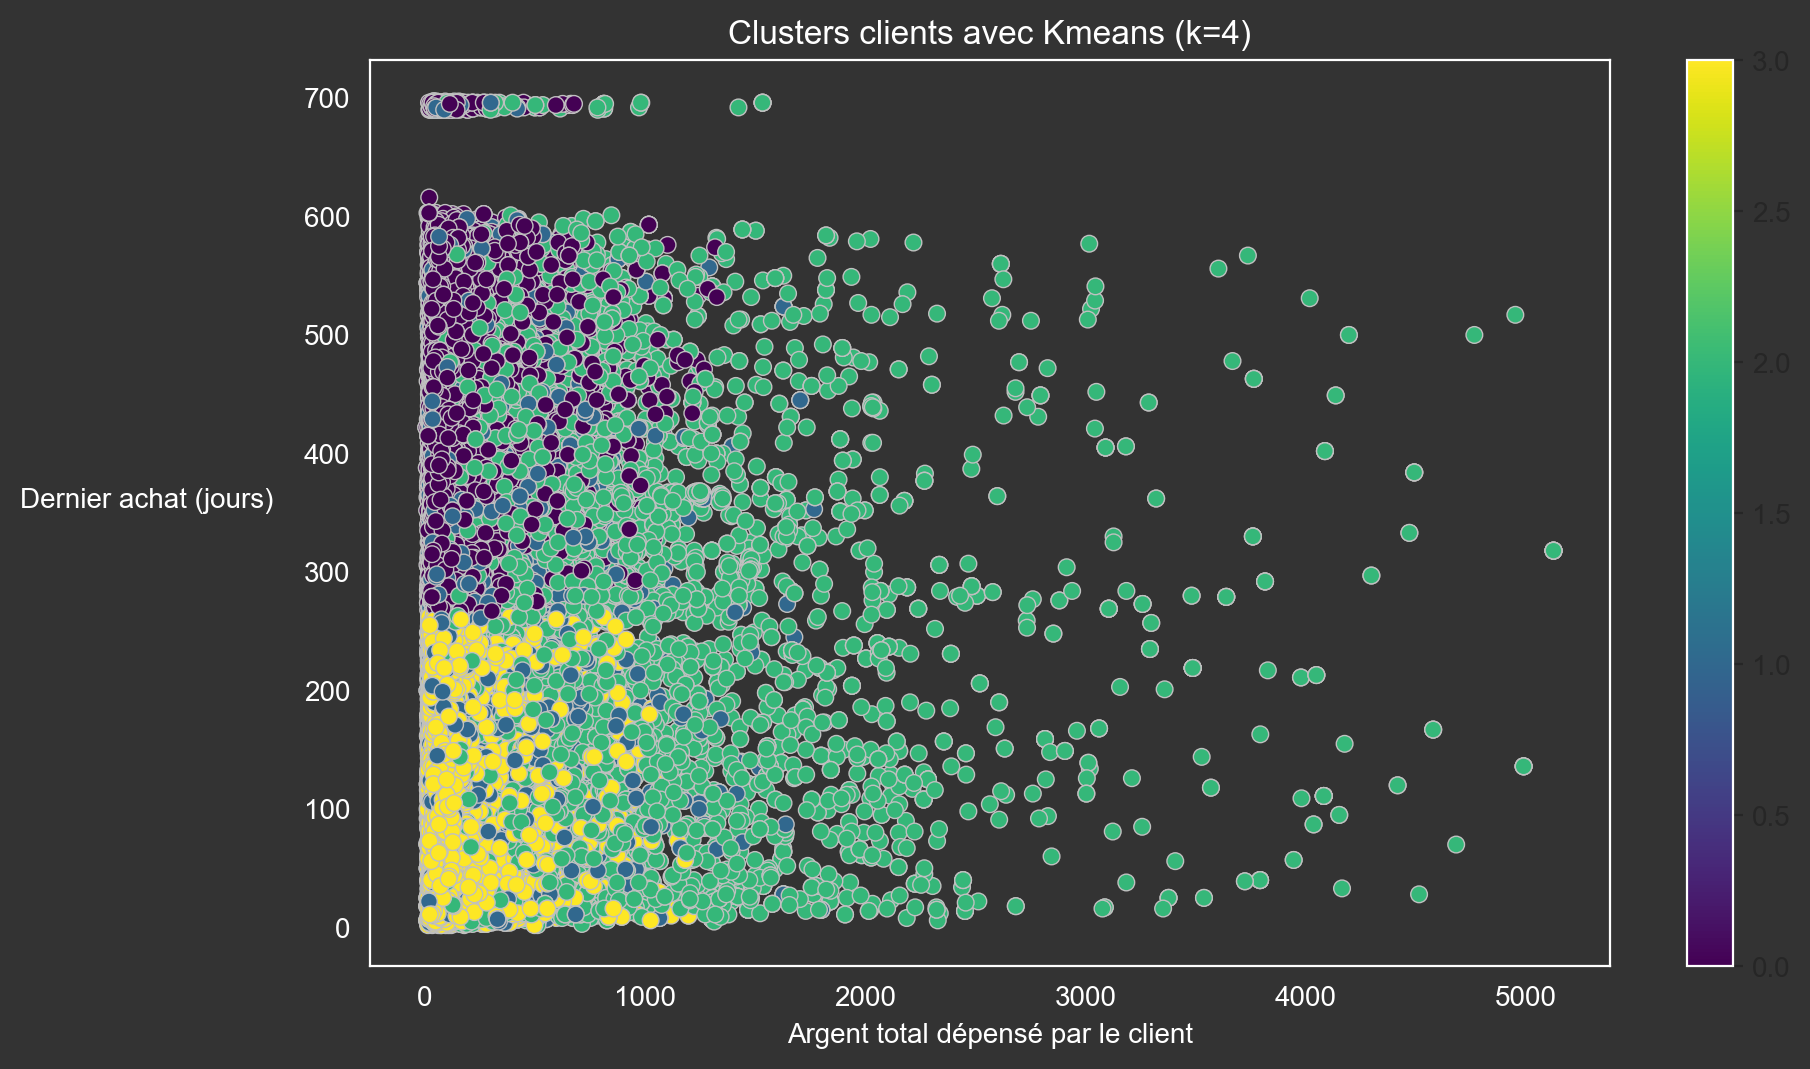

In [37]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['total_amount_client'], X['days_since_last_purchase'], alpha = 1, 
linewidths = 0.5, edgecolors = 'silver', c = kmeans.labels_, cmap = 'viridis')
plt.xlabel('Argent total dépensé par le client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.18, 0.5)
plt.ylabel('Dernier achat (jours)', color = 'white', rotation = 360)
plt.title('Clusters clients avec Kmeans (k=4)')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.colorbar()
plt.show()

Text(0.5, 0, 'Review Score')

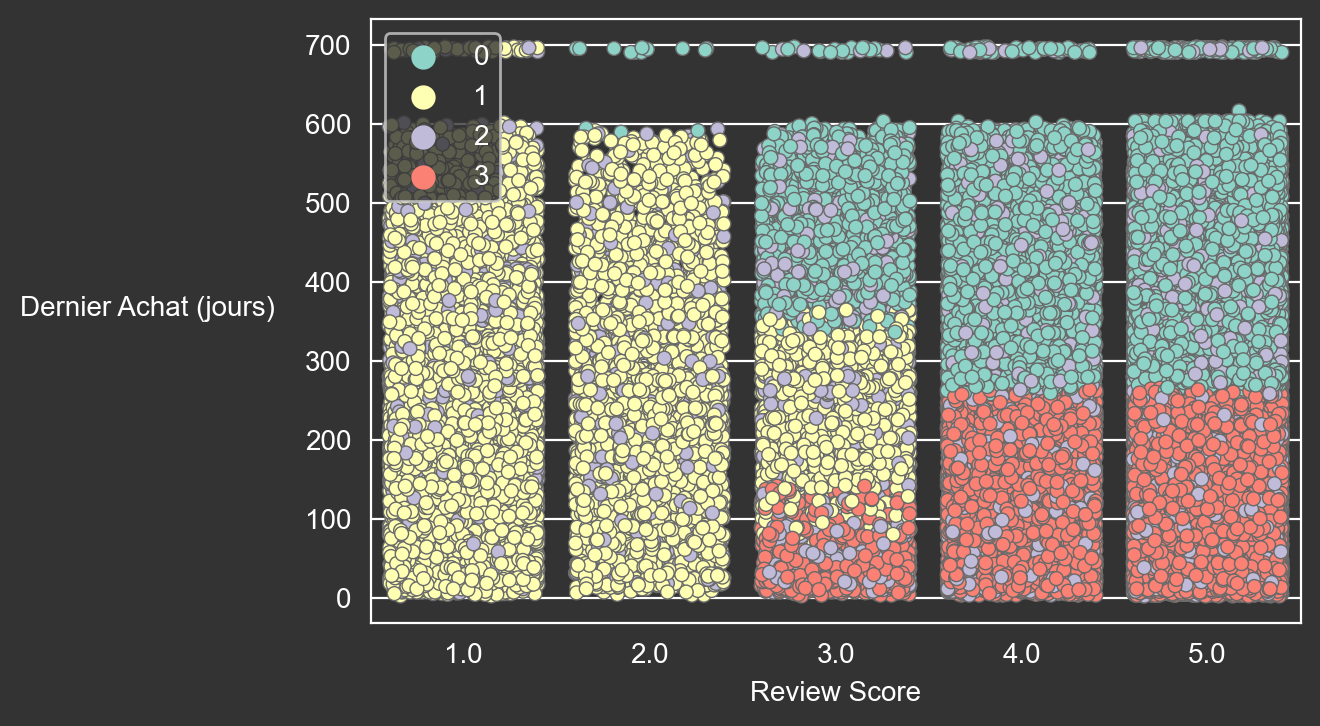

In [8]:
sns.stripplot(data = X, x = "review_score", y = "days_since_last_purchase", 
hue = kmeans.labels_, jitter = 0.4, linewidth = 0.5)
plt.gca().yaxis.set_label_coords( - 0.24, 0.5)
plt.gca().xaxis.label.set_color("white")
plt.gca().yaxis.label.set_color("white")
plt.gca().tick_params(axis = "x", colors = "white")
plt.gca().tick_params(axis = "y", colors = "white")
plt.gca().set_ylabel("Dernier Achat (jours)", rotation = 360)
plt.gca().set_xlabel("Review Score")

(0.0, 10.0)

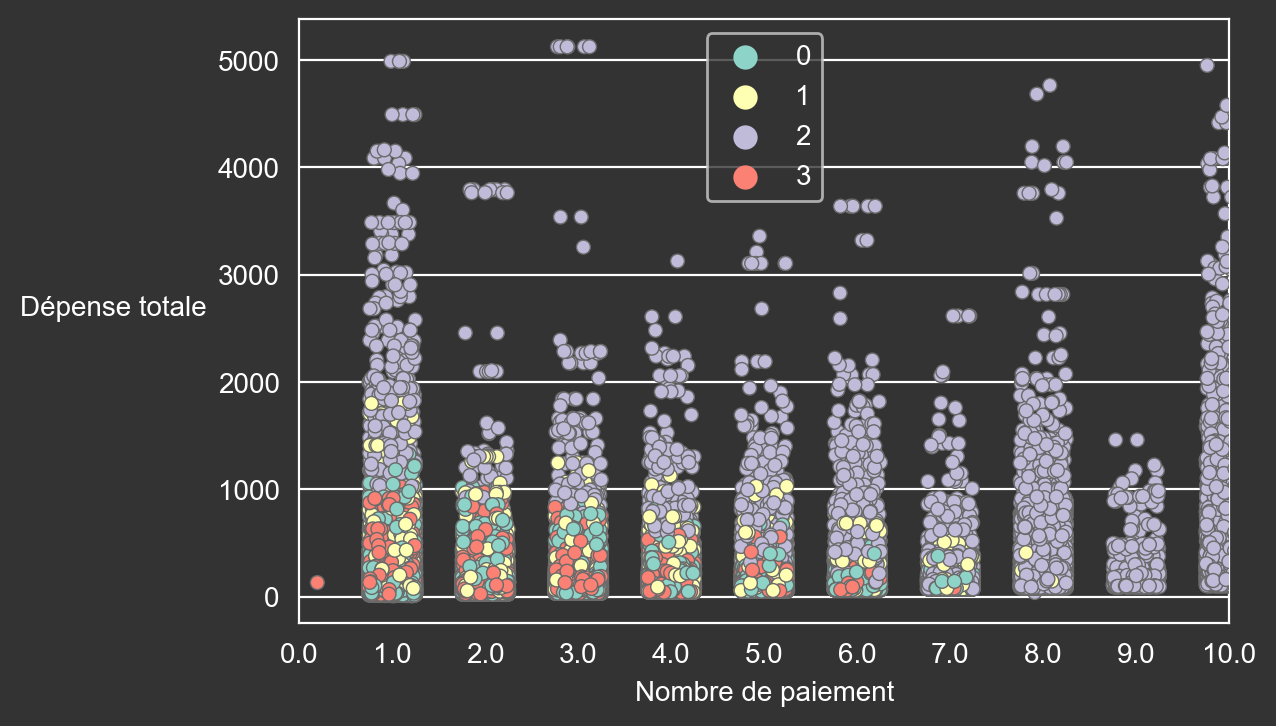

In [25]:
sns.stripplot(data = X, x = "payment_installments", y = "total_amount_client", 
hue = kmeans.labels_, jitter = 0.25, linewidth = 0.5)
plt.gca().yaxis.set_label_coords( - 0.2, 0.5)
plt.gca().xaxis.label.set_color("white")
plt.gca().yaxis.label.set_color("white")
plt.gca().tick_params(axis = "x", colors = "white")
plt.gca().tick_params(axis = "y", colors = "white")
plt.gca().set_ylabel("Dépense totale", rotation = 360)
plt.gca().set_xlabel("Nombre de paiement")
plt.xlim(0, 10)

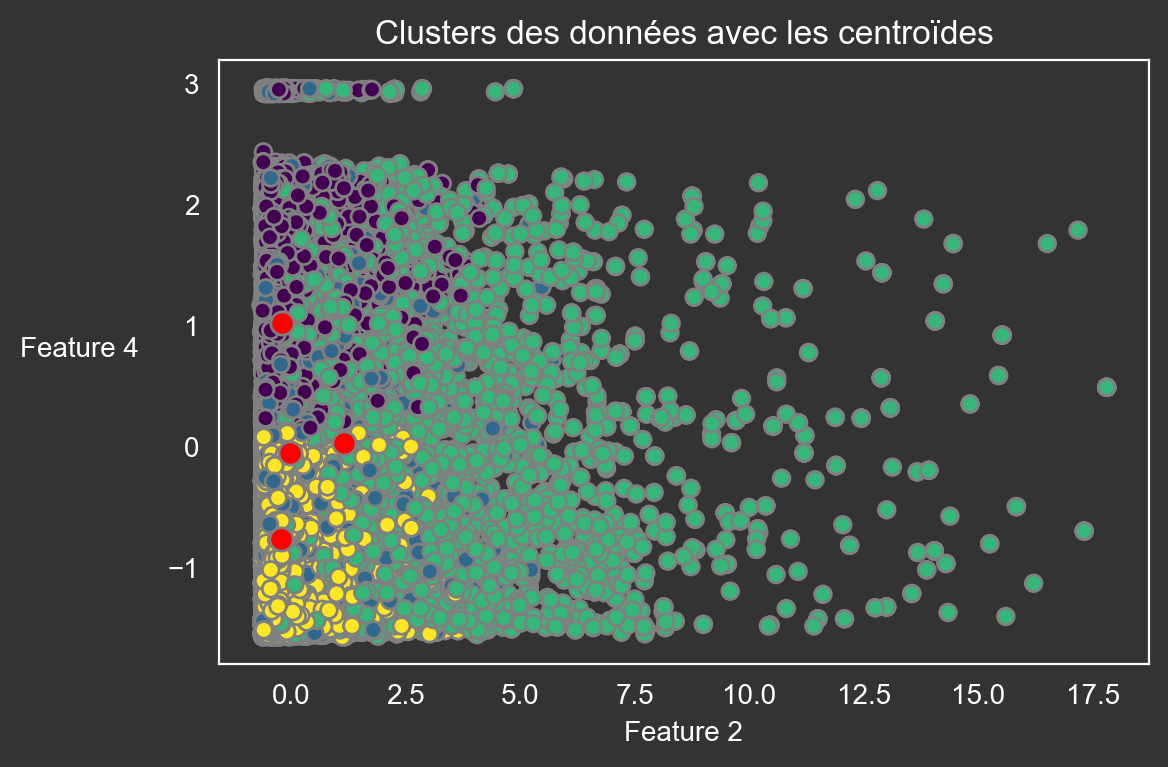

In [50]:
# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Créer une liste de couleurs pour les points de données
colors = ['blue', 'green', 'purple']

# Tracer les points de données
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c = data['cluster'], 
cmap='viridis', alpha = 1, edgecolors = 'gray')

# Tracer les centroïdes
plt.scatter(centroids[:, 1], centroids[:, 3], marker='o', s=70, 
color = 'r', edgecolors = 'gray')
plt.gca().yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel('Feature 2', color = 'white')
plt.ylabel('Feature 4', color = 'white', rotation = 360)
plt.title('Clusters des données avec les centroïdes')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()

In [85]:
data_cluster.shape

(102049, 5)

In [71]:
data_cluster = data[['review_score', 'total_amount_client', 
'payment_installments', 'days_since_last_purchase', 'cluster']]

# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data_cluster.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 100)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        review_score                                              total_amount_client              \
               count      mean       std  min  25%  50%  75%  max               count        mean   
cluster                                                                                             
0            31045.0  4.635626  0.597211  2.0  4.0  5.0  5.0  5.0             31045.0  129.190319   
1            16179.0  1.645837  0.834294  1.0  1.0  1.0  2.0  3.0             16179.0  179.219561   
2            13370.0  4.194914  1.223601  1.0  4.0  5.0  5.0  5.0             13370.0  506.919873   
3            41455.0  4.687275  0.541068  3.0  4.0  5.0  5.0  5.0             41455.0  127.792281   

                                                               payment_installments            \
                std    min      25%     50%       75%      max                count      mean   
cluster                                                                                         
0

In [114]:
data = [
    {'r': 40.62/10, 'theta': 'Taille (40.6%)'},
    {'r': 4.6, 'theta': 'Review (4.6★)'},
    {'r': 125/100, 'theta': 'Dernier Achat (125j)'},
    {'r': 1.95/2, 'theta': 'Nombre de paiment (x1.95)'},
    {'r': 127.79/100, 'theta': 'Dépense totale (127.79BRL)'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Caractéristiques Cluster 3",
line_close=True, template='plotly_dark', color_discrete_sequence=['turquoise'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=20,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,5], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

# Augmenter la résolution du rendu
fig.update_layout(
    autosize=False,
    width=1476,  # Largeur du graphique en pixels
    height=787  # Hauteur du graphique en pixels
)

fig.add_annotation(
    x = -0.05,
    y = -0.1,
    text="Note : Note la plus basse du cluster : 3.0 / Un maximum de 266 jours depuis la dernière commande",
    showarrow=False,
    font=dict(
        family="Optima",
        size=18,
        color="white"
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [110]:
data = [
    {'r': 13.10/10, 'theta': 'Taille (13.1%)'},
    {'r': 4.1, 'theta': 'Review (4.1★)'},
    {'r': 247/100, 'theta': 'Dernier Achat (247j)'},
    {'r': 8.40/2, 'theta': 'Nombre de paiment (x8.40)'},
    {'r': 500/100, 'theta': 'Dépense totale (506.91BRL)'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Caractéristiques Cluster 2",
line_close=True, template='plotly_dark', color_discrete_sequence=['turquoise'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=20,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,5], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

# Augmenter la résolution du rendu
fig.update_layout(
    autosize=False,
    width=1476,  # Largeur du graphique en pixels
    height=787  # Hauteur du graphique en pixels
)

fig.add_annotation(
    x = -0.05,
    y = -0.1,
    text="Note : Les clients de ce clusters dépense pour minimum 37.58RBL et maximum 5130RBL, un record par rapport aux autres clusters qui se situe vers 1000RBL maximum",
    showarrow=False,
    font=dict(
        family="Optima",
        size=18,
        color="white"
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [106]:
data = [
    {'r': 15.85/10, 'theta': 'Taille (15.8%)'},
    {'r': 1.6, 'theta': 'Review (1.6★)'},
    {'r': 235/100, 'theta': 'Dernier Achat (235j)'},
    {'r': 2.41/2, 'theta': 'Nombre de paiment (x2.41)'},
    {'r': 179.21/100, 'theta': 'Dépense totale (179.21BRL)'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Caractéristiques Cluster 1",
line_close=True, template='plotly_dark', color_discrete_sequence=['turquoise'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=20,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,5], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

# Augmenter la résolution du rendu
fig.update_layout(
    autosize=False,
    width=1476,  # Largeur du graphique en pixels
    height=787  # Hauteur du graphique en pixels
)

fig.add_annotation(
    x = -0.05,
    y = -0.1,
    text="Note : La note la plus haute attribuée par ce cluster est de 3.0",
    showarrow=False,
    font=dict(
        family="Optima",
        size=18,
        color="white"
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [104]:
data = [
    {'r': 30.4/10, 'theta': 'Taille (30.4%)'},
    {'r': 4.63, 'theta': 'Review (4.6★)'},
    {'r': 399.27/100, 'theta': 'Dernier Achat (399j)'},
    {'r': 2.11/2, 'theta': 'Nombre de paiment (x2.11)'},
    {'r': 129.19/100, 'theta': 'Dépense totale (129.19BRL)'},
]

fig = px.line_polar(data, r='r', theta='theta',title="Caractéristiques Cluster 0",
line_close=True, template='plotly_dark', color_discrete_sequence=['turquoise'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=20,
        color="white"
    )
)

# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,5], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

# changer les couleurs de fond et de la grille
fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)

# Augmenter la résolution du rendu
fig.update_layout(
    autosize=False,
    width=1476,  # Largeur du graphique en pixels
    height=787  # Hauteur du graphique en pixels
)

fig.add_annotation(
    x = -0.05,
    y = -0.1,
    text="Note : Les clients de ce clusters n'ont pas commander depuis 252 jours minimum",
    showarrow=False,
    font=dict(
        family="Optima",
        size=18,
        color="white"
    )
)

fig.show()

C:\Users\omira\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# TEST AVEC DBSCAN

## SIMULATION 1

In [103]:
# chargement du df master et conversion des variables temporelles au format datetime

df = pd.read_csv('olist_master.csv')

df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])
df['review_creation_datetime'] = pd.to_datetime(df['review_creation_datetime'])

In [110]:
# Sélectionner les colonnes pertinentes pour la segmentation
data = df[['review_score', 'payment_installments', 'total_amount_client', 'price', 'days_since_last_purchase']]

data = data[data['total_amount_client'] <= 6000]

# Normaliser les données numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['review_score', 'payment_installments', 
'total_amount_client', 'price', 'days_since_last_purchase']])

# Créer un modèle DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=50)

# Effectuer la segmentation
clusters = dbscan.fit_predict(scaled_data)

# Ajouter les informations de clustering au DataFrame
data["cluster"] = clusters

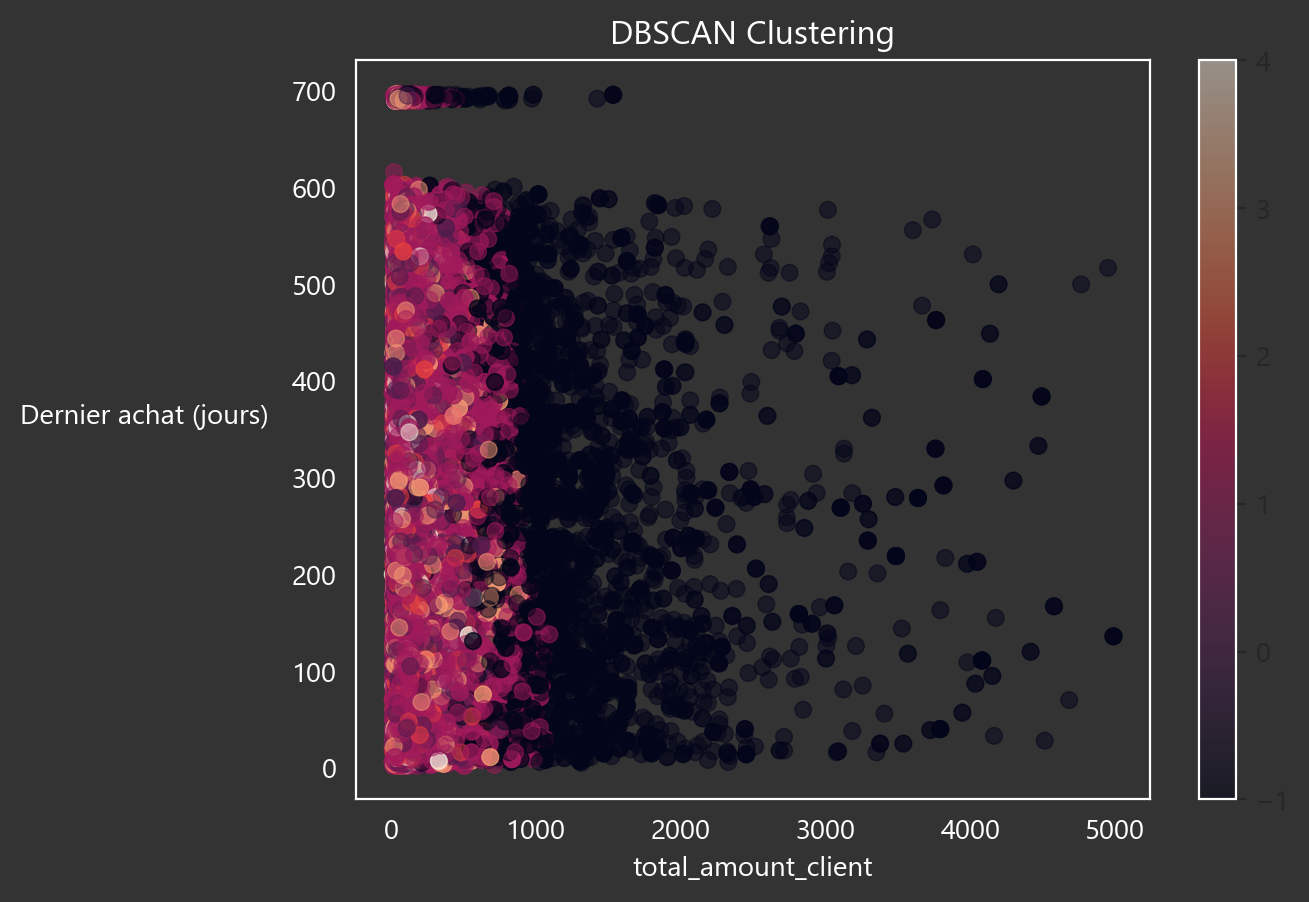

In [116]:
# Afficher les résultats
plt.scatter(data['total_amount_client'], data['days_since_last_purchase'], 
alpha=0.5, linewidths=0.5, c=data["cluster"])
plt.xlabel('total_amount_client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.2666, 0.5)
plt.ylabel('Dernier achat (jours)', color = 'white', rotation = 360)
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.title("DBSCAN Clustering")
plt.colorbar()
plt.grid(False)
plt.show()

# à la place de la color bar gradient mettre des couleurs distinctes à la place
# avec 4 étiquettes

In [115]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        review_score                                              payment_installments                      \
               count      mean       std  min  25%  50%  75%  max                count      mean       std   
cluster                                                                                                      
-1            4520.0  3.279646  1.571384  1.0  2.0  4.0  5.0  5.0               4520.0  6.373451  4.208276   
 0           19020.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0              19020.0  2.635857  2.418969   
 1           58381.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0              58381.0  2.778455  2.571880   
 2            7987.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0               7987.0  2.712908  2.476200   
 3            9556.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0               9556.0  2.886354  2.621981   
 4            2818.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0               2818.0  2.521292  2.171165   

         

## SIMULATION 2

In [10]:
# chargement du df master et conversion des variables temporelles au format datetime

df = pd.read_csv('olist_master.csv')

df['order_purchase_datetime'] = pd.to_datetime(df['order_purchase_datetime'])
df['order_delivered_datetime'] = pd.to_datetime(df['order_delivered_datetime'])
df['review_creation_datetime'] = pd.to_datetime(df['review_creation_datetime'])

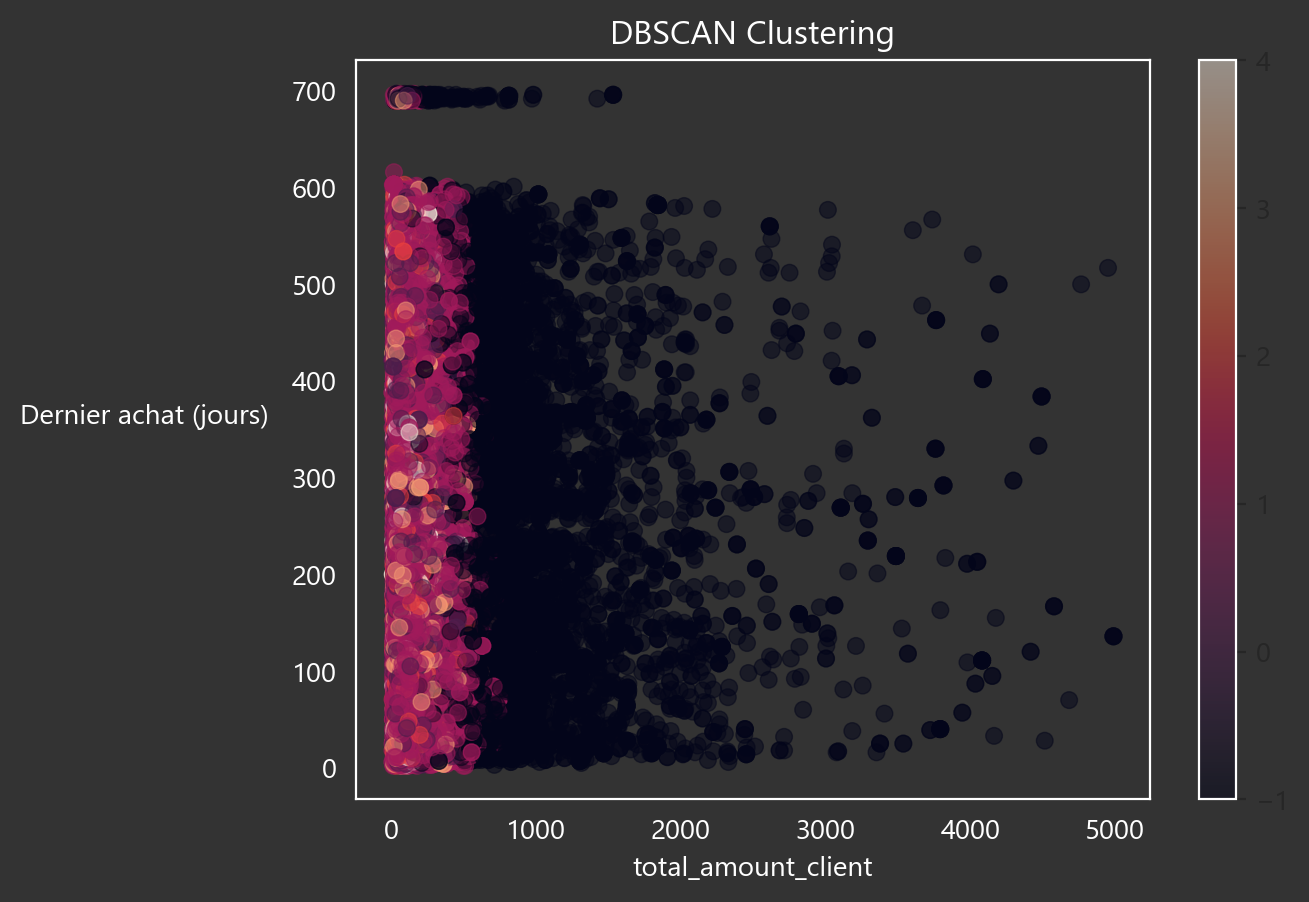

In [118]:
# Sélectionner les colonnes pertinentes pour la segmentation
data = df[['review_score', 'payment_installments', 'total_amount_client', 'price', 'days_since_last_purchase']]

data = data[data['total_amount_client'] <= 6000]

# Normaliser les données numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['review_score', 'payment_installments', 'total_amount_client', 'price', 'days_since_last_purchase']])

# Créer un modèle DBSCAN
dbscan = DBSCAN(eps=0.66, min_samples=100)

# Effectuer la segmentation
clusters = dbscan.fit_predict(scaled_data)

# Ajouter les informations de clustering au DataFrame
data["cluster"] = clusters

# Afficher les résultats
plt.scatter(data['total_amount_client'], data['days_since_last_purchase'], 
alpha=0.5, linewidths=0.5, c=data["cluster"])
plt.xlabel('total_amount_client', color = 'white')
plt.gca().yaxis.set_label_coords(-0.2666, 0.5)
plt.ylabel('Dernier achat (jours)', color = 'white', rotation = 360)
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.title("DBSCAN Clustering")
plt.colorbar()
plt.grid(False)
plt.show()

# PLOTTER AVEC D'AUTRES VARIABLES
# RAJOUTER L'INERTIE
# chercher la valeur de la distance (écart intercluster et intra cluster)selon espilon

In [119]:
# Calculer les moyennes des variables pour chaque cluster
cluster_describe = data.groupby('cluster').describe()

# Définir la largeur maximale des colonnes de sortie
pd.set_option('display.width', 110)
# Afficher les moyennes des variables pour chaque cluster
print(cluster_describe)

        review_score                                              payment_installments                      \
               count      mean       std  min  25%  50%  75%  max                count      mean       std   
cluster                                                                                                      
-1            8084.0  3.341539  1.577006  1.0  2.0  4.0  5.0  5.0               8084.0  6.280183  3.925579   
 0           18489.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0              18489.0  2.552491  2.324838   
 1           56968.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0              56968.0  2.690352  2.473912   
 2            7482.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0               7482.0  2.431703  2.132040   
 3            8811.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0               8811.0  2.637045  2.371206   
 4            2448.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0               2448.0  1.981618  1.389460   

         

# Montrer les différences avec DBScan
# Expliquer le choix du nombre de clusters par rapport à kmeans
# pourquoi 4 clusters et pas 6 etc

# DENDOGRAMME

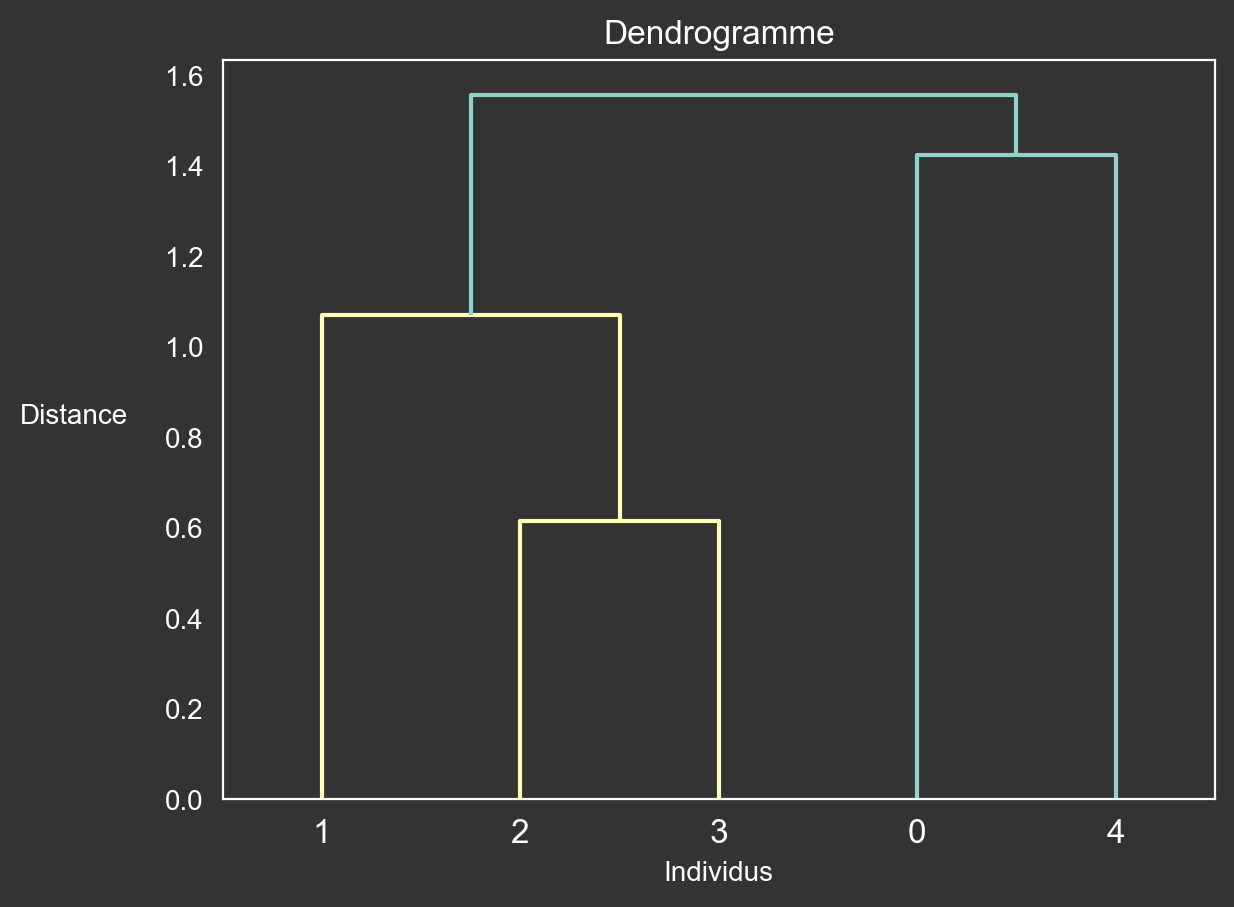

In [10]:
# Chargement des données à partir du fichier CSV
data = df

# Sélection des colonnes pour l'analyse de segmentation de clientèle
selected_columns = ['review_score', 'payment_installments', 'total_amount_client', 'price', 'days_since_last_purchase']

# Extraction des données sélectionnées
selected_data = data[selected_columns]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Calcul de la matrice de similarité
similarity_matrix = np.corrcoef(scaled_data.T)

# Calcul du lien hiérarchique
linkage = hierarchy.linkage(similarity_matrix, method='average')

# Construction du dendrogramme
dendrogram = hierarchy.dendrogram(linkage)

# Affichage du dendrogramme
plt.xlabel('Individus', color = 'white')
plt.gca().yaxis.set_label_coords(-0.15, 0.5)
plt.ylabel('Distance', color = 'white', rotation = 360)
plt.title('Dendrogramme')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.grid(False)
plt.show()